In [37]:
import re
import moval
import itertools
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np

## Let's check the model parameters first (pickle)

In [49]:
# pickle_path_org = 'HAM_classification_accuracy_max_class_probability-conf_ts-model_False.pkl'
# pickle_path_cs = 'HAM_classification_accuracy_max_class_probability-conf_ts-model_True.pkl'
pickle_path_org = 'Cifar10_classification_accuracy_max_class_probability-conf_ts-model_False.pkl'
pickle_path_cs = 'Cifar10_classification_accuracy_max_class_probability-conf_ts-model_True.pkl'
# pickle_path_org = 'Cardiac_segmentation_f1score_max_class_probability-conf_atc-model_False.pkl'
# pickle_path_cs = 'Cardiac_segmentation_f1score_max_class_probability-conf_atc-model_True.pkl'
# pickle_path_org = 'Cifar10_classification_accuracy_max_class_probability-conf_atc-model_False.pkl'
# pickle_path_cs = 'Cifar10_classification_accuracy_max_class_probability-conf_atc-model_True.pkl'

In [50]:
with open(pickle_path_org, 'rb') as file:
    loaded_ckpt = pickle.load(file)
org_param = loaded_ckpt["param"]
print(org_param)

[3.03221273]


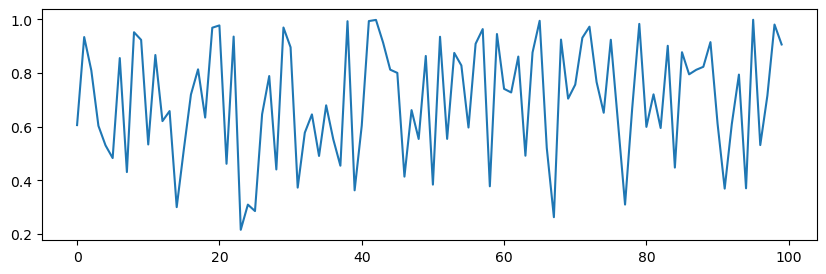

In [51]:
plt.figure(figsize=(10, 3))
plt.plot(loaded_ckpt["fitted_perf"][:100])

In [52]:
np.mean(loaded_ckpt["fitted_perf"])

0.7013333289713675

In [53]:
len(loaded_ckpt["fitted_perf"])

3000

[5.66379375 4.87982674 3.00604258 3.51030836 1.98783808 1.92620659
 0.72849407 0.74903364 0.59226189 0.19145985]


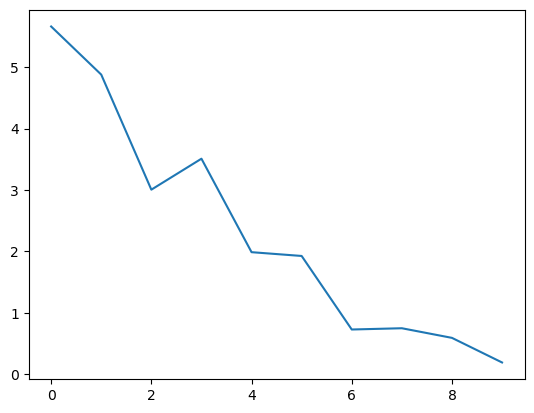

In [54]:
with open(pickle_path_cs, 'rb') as file:
    loaded_ckpt = pickle.load(file)
cs_param = loaded_ckpt["param"]
print(cs_param)
plt.plot(loaded_ckpt["param"])

In [44]:
print(np.mean(loaded_ckpt["fitted_perf"]))

0.7006666666666667


In [65]:
# investigate the model trained with balanced training strategies
# pickle_path_org = 'Cifar10ci2_classification_accuracy_max_class_probability-conf_ts-atc-model_False.pkl'
# pickle_path_cs = 'Cifar10ci2_classification_accuracy_max_class_probability-conf_ts-atc-model_True.pkl'
# pickle_path_org = 'Cifar10ci2_classification_accuracy_max_class_probability-conf_atc-model_False_batch.pkl'
# pickle_path_cs = 'Cifar10ci2_classification_accuracy_max_class_probability-conf_atc-model_True_batch.pkl'
#
pickle_path_org = 'Cifar10_classification_accuracy_max_class_probability-conf_ts-model_False_batch.pkl'
pickle_path_cs = 'Cifar10_classification_accuracy_max_class_probability-conf_ts-model_True_batch.pkl'

In [66]:
with open(pickle_path_org, 'rb') as file:
    loaded_ckpt = pickle.load(file)
org_param = loaded_ckpt["param"]
print(org_param)

[3.03221273]


In [67]:
np.mean(loaded_ckpt["fitted_perf"])

0.7013333289713675

In [68]:
with open(pickle_path_cs, 'rb') as file:
    loaded_ckpt = pickle.load(file)
cs_param = loaded_ckpt["param"]
print(cs_param)

[3.2683238  3.2683238  3.2683238  3.2683238  3.2683238  3.2683238
 3.2683238  3.2683238  0.38620329 0.38620329]


In [69]:
print(np.mean(loaded_ckpt["fitted_perf"]))

0.7013333324272312


In [60]:
# check the results of ci2

In [15]:
test_syn_conds = ['gaussian_blur', 'motion_blur', 'snow', 'contrast', 'jpeg_compression', 'shot_noise', 'saturate',
                  'impulse_noise', 'pixelate', 'speckle_noise', 'frost', 'defocus_blur', 'brightness',
                  'gaussian_noise', 'zoom_blur', 'fog', 'spatter', 'glass_blur', 'elastic_transform']
# estim_row_index
estim_rows = [2 + i * 4 for i in range(36)]
# real_row_index
real_rows = [3 + i * 4 for i in range(36)]

In [16]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR10ci2_accuracy_{test_syn_cond}.txt"
    res = pd.read_csv(filepath, header=None)

    estim_res_file = []
    for estim_row in estim_rows:
        estim_res = res.iloc[[estim_row]]
        results_conds = []
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1])))
        results_conds.append(float(estim_res[1].to_numpy()))
        results_conds.append(float(estim_res[2].to_numpy()))
        results_conds.append(float(estim_res[3].to_numpy()))
        results_conds.append(float(str(estim_res[4].to_numpy()[0].split(']')[0])))
        results_conds = np.array(results_conds)
        estim_res_file.append(results_conds)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    for real_row in real_rows:
        real_res = res.iloc[[real_row]]
        results_conds = []
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1])))
        results_conds.append(float(real_res[1].to_numpy()))
        results_conds.append(float(real_res[2].to_numpy()))
        results_conds.append(float(real_res[3].to_numpy()))
        results_conds.append(float(str(real_res[4].to_numpy()[0].split(']')[0])))
        results_conds = np.array(results_conds)
        real_res_file.append(results_conds)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.T)
    real_res_all.append(real_res_file.T)
estim_res_all = np.array(estim_res_all)
estim_res_all = estim_res_all.reshape((-1, 36)).T
real_res_all = np.array(real_res_all)
real_res_all = real_res_all.reshape((-1, 36)).T

In [17]:
diff_mean = np.abs(estim_res_all - real_res_all)

In [18]:
np.mean(diff_mean,axis=1)

array([0.30465543, 0.31922788, 0.28261435, 0.34613801, 0.08114516,
       0.09660259, 0.1501687 , 0.1554771 , 0.07384209, 0.08830731,
       0.05944765, 0.07392546, 0.13045968, 0.13624538, 0.1026798 ,
       0.11526253, 0.12280194, 0.12926804, 0.14147924, 0.14622755,
       0.05916241, 0.06735639, 0.0428812 , 0.05218947, 0.05665714,
       0.06323759, 0.05925564, 0.0664406 , 0.0444391 , 0.05813383,
       0.04846165, 0.05137895, 0.03871128, 0.05521353, 0.0390782 ,
       0.05553083])

-0.008193984962406003


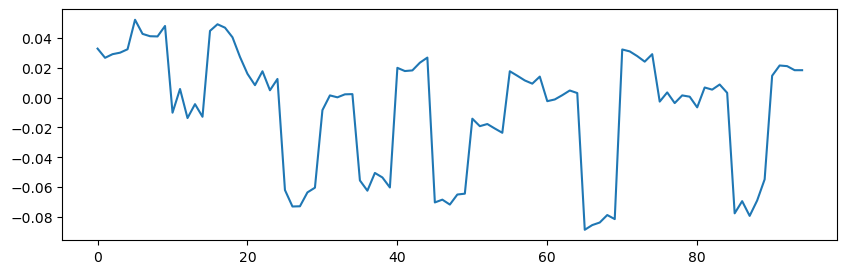

In [19]:
# MCP, ATC
plt.figure(figsize=(10, 3))
print(np.mean(diff_mean[20] - diff_mean[21]))
plt.plot(diff_mean[20] - diff_mean[21])
m = diff_mean[20] - diff_mean[21]

In [20]:
test_syn_conds = ['gaussian_blur', 'motion_blur', 'snow', 'contrast', 'jpeg_compression', 'shot_noise', 'saturate',
                  'impulse_noise', 'pixelate', 'speckle_noise', 'frost', 'defocus_blur', 'brightness',
                  'gaussian_noise', 'zoom_blur', 'fog', 'spatter', 'glass_blur', 'elastic_transform']
# estim_row_index
estim_rows = [2 + i * 4 for i in range(36)]
# real_row_index
real_rows = [3 + i * 4 for i in range(36)]

In [21]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR10_accuracy_{test_syn_cond}.txt"
    res = pd.read_csv(filepath, header=None)

    estim_res_file = []
    for estim_row in estim_rows:
        estim_res = res.iloc[[estim_row]]
        results_conds = []
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1])))
        results_conds.append(float(estim_res[1].to_numpy()))
        results_conds.append(float(estim_res[2].to_numpy()))
        results_conds.append(float(estim_res[3].to_numpy()))
        results_conds.append(float(str(estim_res[4].to_numpy()[0].split(']')[0])))
        results_conds = np.array(results_conds)
        estim_res_file.append(results_conds)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    for real_row in real_rows:
        real_res = res.iloc[[real_row]]
        results_conds = []
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1])))
        results_conds.append(float(real_res[1].to_numpy()))
        results_conds.append(float(real_res[2].to_numpy()))
        results_conds.append(float(real_res[3].to_numpy()))
        results_conds.append(float(str(real_res[4].to_numpy()[0].split(']')[0])))
        results_conds = np.array(results_conds)
        real_res_file.append(results_conds)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.T)
    real_res_all.append(real_res_file.T)
estim_res_all = np.array(estim_res_all)
estim_res_all = estim_res_all.reshape((-1, 36)).T
real_res_all = np.array(real_res_all)
real_res_all = real_res_all.reshape((-1, 36)).T

In [22]:
diff_mean = np.abs(estim_res_all - real_res_all)

0.006401503759398509


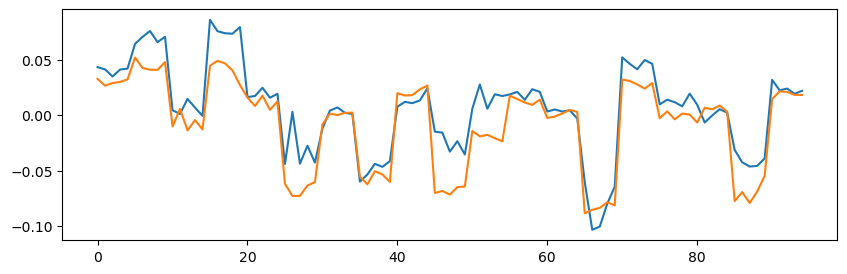

In [23]:
# MCP, CS TS-ATC
plt.figure(figsize=(10, 3))
print(np.mean(diff_mean[20] - diff_mean[21]))
plt.plot(diff_mean[20] - diff_mean[21])
plt.plot(m)

In [24]:
# visualize the results, need access to the logits

In [25]:
# validation dataset
val_data = "./predictions_val.csv"
# test dataset
test_data = "./predictions_val_contrast.csv"
#
cnn_pred = pd.read_csv(val_data)
targets_all = np.array(cnn_pred[['target_0', 'target_1', 'target_2', 'target_3', 'target_4',
                                 'target_5', 'target_6', 'target_7', 'target_8', 'target_9']])
logits = np.array(cnn_pred[['logit_0', 'logit_1', 'logit_2', 'logit_3', 'logit_4',
                               'logit_5', 'logit_6', 'logit_7', 'logit_8', 'logit_9']])
gt = np.argmax(targets_all, axis = 1)
#
cnn_pred_test = pd.read_csv(test_data)
targets_all_test = np.array(cnn_pred_test[['target_0', 'target_1', 'target_2', 'target_3', 'target_4',
                                           'target_5', 'target_6', 'target_7', 'target_8', 'target_9']])
logits_test = np.array(cnn_pred_test[['logit_0', 'logit_1', 'logit_2', 'logit_3', 'logit_4',
                                      'logit_5', 'logit_6', 'logit_7', 'logit_8', 'logit_9']])
gt_test = np.argmax(targets_all_test, axis = 1)

In [26]:
def make_ridge_plot_whole(df, mean_conf, acc_all, title = 'Distribution of MCP'):
    """Make the ridge plots for the test case

    Args:
        df: The dataframe which contain all the information.
        mean_conf: mean confidence.
        title: The given title to be shown.

    """
    sns.set(rc={'figure.figsize':(8,1)})
    sns.set_theme(style="white")
    
    ax = sns.kdeplot(data=df, x="Confidence Score", fill=True, alpha=1, linewidth=1.5, color = '#1f77b4', bw_adjust=1)
    sns.kdeplot(data=df, x="Confidence Score", color="w", lw=2, bw_adjust=1)
    #
    ax = plt.gca()
    x, y = ax.lines[0].get_data()
    height = np.interp(mean_conf, x, y)
    ax.axvline(mean_conf, 0.06, 10, color="black", lw=3, alpha=0.7, ls='-')
    #
    # Create a hatched texture fill for the box with gradient color
    gradient_steps = 50  # Number of steps for the gradient
    for i in range(gradient_steps):
        # Calculate the gradient color at this step
        gradient_color = (1 - i / gradient_steps) * np.array([1, 1, 1]) + (i / gradient_steps) * np.array([0x00, 0x00, 0x00]) / 255
        facecolor = tuple(gradient_color)
        
        # Add a rectangle patch for this step
        x_start = (i / gradient_steps) * acc_all
        x_end = ((i + 1) / gradient_steps) * acc_all
        texture_box = patches.Rectangle((x_start, 0), x_end - x_start, 10, linewidth=0, edgecolor='none', facecolor=facecolor, alpha=0.5)
        ax.add_patch(texture_box)
    
    #
    # also pad the differences
    x_left = np.min((mean_conf, acc_all))
    x_right = np.max((mean_conf, acc_all))
    diff_box = patches.Rectangle((x_left, 0), x_right - x_left, 10, linewidth=0, edgecolor='none', facecolor='#A2142F', alpha=0.5)
    ax.add_patch(diff_box)
    
    sns.despine(left=True, bottom=True)
    #
    ax.set(yticks=[], ylabel="")
    ax.set(xticks=[0., 0.2, 0.4, 0.6, 0.8, 1.0], xlabel="")  # Set x-ticks here
    
    plt.xlim(0., 1.0)
    plt.title(title)

In [27]:
def make_ridge_plot(df, mean_conf, cls_acc, height_ratio1, height_ratio2, title = 'Distribution of MCP'):
    """Make the ridge plots for the test case

    Args:
        df: The dataframe which contain all the information.
        mean_conf: A list of ``d`` mean confidence.
        height_ratio: A manual adjust parameter to make sure the mean confidence is within the plot.
        title: The given title to be shown.

    """
    sns.set(rc={'figure.figsize':(8,10)})
    sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

    # Initialize the FacetGrid object
    g = sns.FacetGrid(df, row="Prediction", hue="Prediction", aspect=12, height=.6)

    # Draw the densities in a few steps
    g.map(sns.kdeplot, "Confidence Score",
          fill=True, alpha=1, linewidth=1.5, color = '#1f77b4', bw_adjust=1)
    g.map(sns.kdeplot, "Confidence Score", color="w", lw=2, bw_adjust=1)

    # passing color=None to refline() uses the hue mapping
    g.refline(y=-0.1, linewidth=1, linestyle="-")

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold",
                ha="left", va="center", transform=ax.transAxes)
    g.map(label, "Confidence Score")

    # Plot the mean confidence
    def plot_mean(x, color, label):
        ax = plt.gca()
        x, y = ax.lines[0].get_data()
        height = np.interp(mean_conf[np.int32(label)], x, y)
        ax.axvline(mean_conf[np.int32(label)], 0.06, height_ratio1, color="black", lw=3, alpha=0.7, ls='-')
    g.map(plot_mean, "Prediction")
    #
    def plot_acc(x, color, label):
        gradient_steps = 50  # Number of steps for the gradient
        ax = plt.gca()
        acc_all = cls_acc[np.int32(label)]
        for i in range(gradient_steps):
            # Calculate the gradient color at this step
            gradient_color = (1 - i / gradient_steps) * np.array([1, 1, 1]) + (i / gradient_steps) * np.array([0x00, 0x00, 0x00]) / 255
            facecolor = tuple(gradient_color)
            alpha = 0.5  # Constant transparency level for each step
            
            # Add a rectangle patch for this step
            x_start = (i / gradient_steps) * acc_all
            x_end = ((i + 1) / gradient_steps) * acc_all
            texture_box = patches.Rectangle((x_start, 0), x_end - x_start, height_ratio2, linewidth=0, edgecolor='none', facecolor=facecolor, alpha=alpha)
            ax.add_patch(texture_box)
    g.map(plot_acc, "Prediction")
    #
    def plot_err(x, color, label):
        ax = plt.gca()
        acc_all = cls_acc[np.int32(label)]
        _mean_conf = mean_conf[np.int32(label)]
        x_left = np.min((_mean_conf, acc_all))
        x_right = np.max((_mean_conf, acc_all))
        diff_box = patches.Rectangle((x_left, 0), x_right - x_left, height_ratio2, linewidth=0, edgecolor='none', facecolor='#A2142F', alpha=0.5)
        ax.add_patch(diff_box)
            
    g.map(plot_err, "Prediction")

    # Set the subplots to overlap
    g.figure.subplots_adjust(hspace=-.6)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[], ylabel="")
    g.set(xticks=[0., 0.2, 0.4, 0.6, 0.8, 1.0], xlabel="")  # Set x-ticks here
    g.set(xlabel="")
    g.despine(bottom=True, left=True)
    #
    plt.suptitle(title, y=0.9)
    # label
    g.fig.text(x=0.03, y=0.5,
           verticalalignment='center', #make sure it's aligned at center vertically
           s='Predicted Class', #this is the text in the ylabel
           size=12, #customize the fontsize if you will
           rotation=90) #vertical text

    # Add legend
    import matplotlib.patches as mpatches
    import matplotlib.lines as mlines

    blue_patch = mpatches.Patch(color='#0074b6', edgecolor=None, label='Confidence\nScore')
    orange_patch = mpatches.Patch(color='black', alpha=0.7, edgecolor=None, label='Accuracy')
    red_patch = mpatches.Patch(color='#A2142F', alpha=0.7, edgecolor=None, label='Estimation\nGap')
    black_line = mlines.Line2D([0.5, 0.5], [0, 1], color='black', lw=3, alpha=0.7, label='Mean\nConfidence')

    plt.xlim(0., 1.0)
    legend = plt.legend(handles=[orange_patch, blue_patch, black_line, red_patch],
               bbox_to_anchor=(0.5, -0.6),  # Centered below the plot
               loc='center',                # Center horizontally
               facecolor='white',
               ncol=4)                      # Arrange items in a single row

    # Center-align the text in the legend
    for text in legend.get_texts():
        text.set_ha('center')

In [28]:
moval_model = moval.MOVAL.load(pickle_path_org)
#
estim_metric_val = moval_model.estimate(logits)
#
pred_val = np.argmax(logits, axis = 1)
real_metric_val = np.sum(gt == pred_val) / len(gt)
#
conf_val = moval_model.model_.calibrate(logits)
#
d = {'Confidence Score': conf_val,
         'ID': range(len(conf_val)),
         'Ground Truth': gt,
         'Prediction': np.argmax(logits, axis=1),
         'Correctness': gt == np.argmax(logits, axis=1)}
df = pd.DataFrame(data=d)

In [29]:
mean_conf = []
cls_acc = []
acc_all = np.sum(gt == np.argmax(logits, axis = 1)) / len(np.argmax(logits, axis = 1))
for k_cls in range(logits.shape[1]):

    k_pos = np.where(np.argmax(logits, axis=1) == k_cls)[0]
    #
    _logits = logits[k_pos, :]
    _gt = gt[k_pos]
    _conf = conf_val[k_pos]
    #
    mean_conf.append(np.mean(_conf))
    #
    acc = np.sum(_gt == np.argmax(_logits, axis = 1)) / len(np.argmax(_logits, axis = 1))
    cls_acc.append(acc)

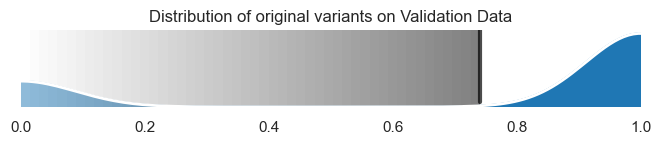

In [30]:
make_ridge_plot_whole(df, np.mean(conf_val), acc_all, title = "Distribution of original variants on Validation Data")
plt.show()

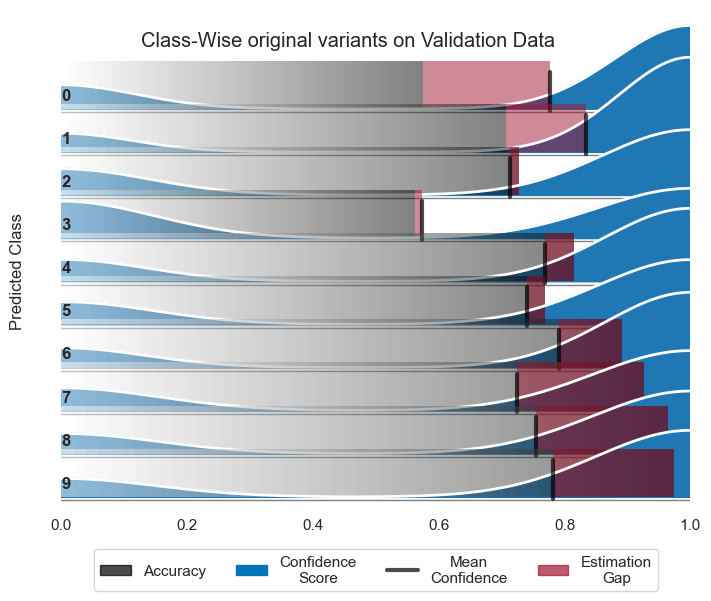

In [31]:
make_ridge_plot(df, mean_conf, cls_acc, height_ratio1 = 0.42, height_ratio2 = 1.5, title = 'Class-Wise original variants on Validation Data')
plt.show()

In [32]:
estim_metric_test = moval_model.estimate(logits_test)
#
pred_test = np.argmax(logits_test, axis = 1)
real_metric_test = np.sum(gt_test == pred_test) / len(gt_test)
#
conf_test = moval_model.model_.calibrate(logits_test)
#
d = {'Confidence Score': conf_test,
         'ID': range(len(conf_test)),
         'Ground Truth': gt_test,
         'Prediction': np.argmax(logits_test, axis=1),
         'Correctness': gt_test == np.argmax(logits_test, axis=1)}
df = pd.DataFrame(data=d)

In [33]:
mean_conf = []
cls_acc = []
acc_all = np.sum(gt_test == np.argmax(logits_test, axis = 1)) / len(np.argmax(logits_test, axis = 1))
for k_cls in range(logits_test.shape[1]):

    k_pos = np.where(np.argmax(logits_test, axis=1) == k_cls)[0]
    #
    _logits = logits_test[k_pos, :]
    _gt = gt_test[k_pos]
    _conf = conf_test[k_pos]
    #
    mean_conf.append(np.mean(_conf))
    #
    acc = np.sum(_gt == np.argmax(_logits, axis = 1)) / len(np.argmax(_logits, axis = 1))
    cls_acc.append(acc)

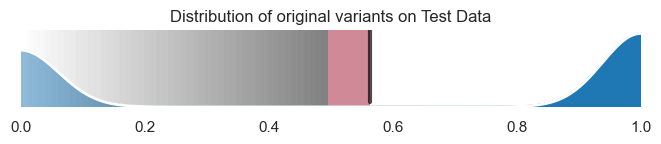

In [34]:
make_ridge_plot_whole(df, np.mean(conf_test), acc_all, title = "Distribution of original variants on Test Data")
plt.show()

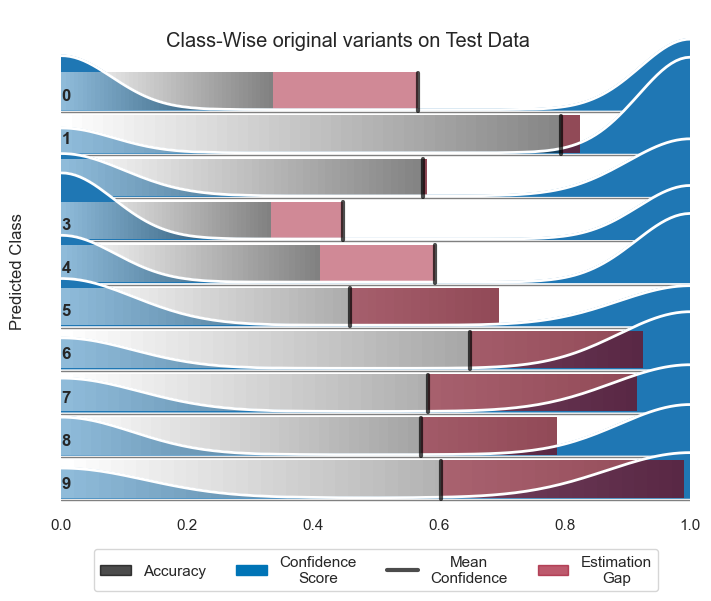

In [35]:
make_ridge_plot(df, mean_conf, cls_acc, height_ratio1 = 0.41, height_ratio2 = 1.5, title = 'Class-Wise original variants on Test Data')
plt.show()

In [44]:
moval_model = moval.MOVAL.load(pickle_path_cs)
#
estim_metric_val = moval_model.estimate(logits)
#
pred_val = np.argmax(logits, axis = 1)
real_metric_val = np.sum(gt == pred_val) / len(gt)
#
conf_val = moval_model.model_.calibrate(logits)
#
d = {'Confidence Score': conf_val,
         'ID': range(len(conf_val)),
         'Ground Truth': gt,
         'Prediction': np.argmax(logits, axis=1),
         'Correctness': gt == np.argmax(logits, axis=1)}
df = pd.DataFrame(data=d)

In [45]:
mean_conf = []
cls_acc = []
acc_all = np.sum(gt == np.argmax(logits, axis = 1)) / len(np.argmax(logits, axis = 1))
for k_cls in range(logits.shape[1]):

    k_pos = np.where(np.argmax(logits, axis=1) == k_cls)[0]
    #
    _logits = logits[k_pos, :]
    _gt = gt[k_pos]
    _conf = conf_val[k_pos]
    #
    mean_conf.append(np.mean(_conf))
    #
    acc = np.sum(_gt == np.argmax(_logits, axis = 1)) / len(np.argmax(_logits, axis = 1))
    cls_acc.append(acc)

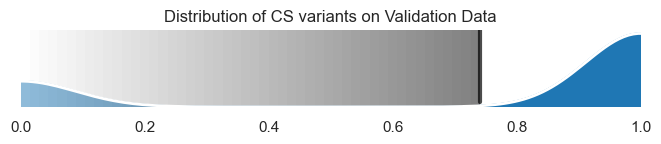

In [46]:
make_ridge_plot_whole(df, np.mean(conf_val), acc_all, title = "Distribution of CS variants on Validation Data")
plt.show()

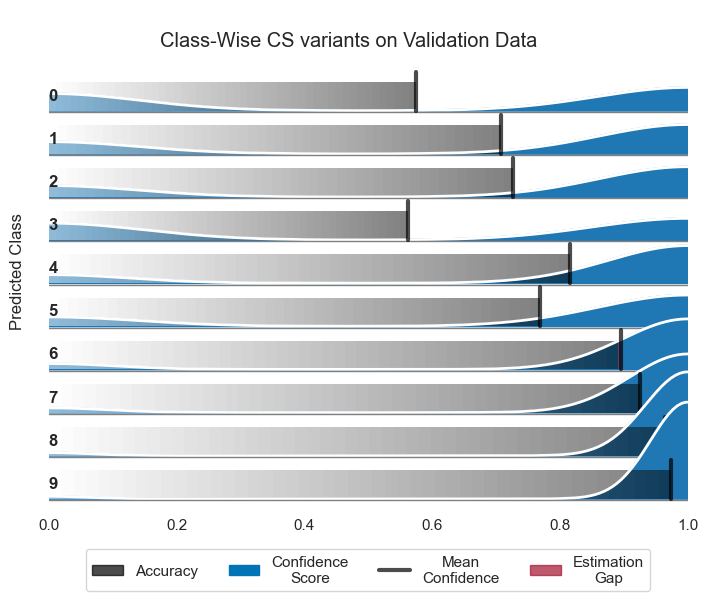

In [47]:
make_ridge_plot(df, mean_conf, cls_acc, height_ratio1 = 0.42, height_ratio2 = 2, title = 'Class-Wise CS variants on Validation Data')
plt.show()

In [48]:
estim_metric_test = moval_model.estimate(logits_test)
#
pred_test = np.argmax(logits_test, axis = 1)
real_metric_test = np.sum(gt_test == pred_test) / len(gt_test)
#
conf_test = moval_model.model_.calibrate(logits_test)
#
d = {'Confidence Score': conf_test,
         'ID': range(len(conf_test)),
         'Ground Truth': gt_test,
         'Prediction': np.argmax(logits_test, axis=1),
         'Correctness': gt_test == np.argmax(logits_test, axis=1)}
df = pd.DataFrame(data=d)

In [49]:
mean_conf = []
cls_acc = []
acc_all = np.sum(gt_test == np.argmax(logits_test, axis = 1)) / len(np.argmax(logits_test, axis = 1))
for k_cls in range(logits_test.shape[1]):

    k_pos = np.where(np.argmax(logits_test, axis=1) == k_cls)[0]
    #
    _logits = logits_test[k_pos, :]
    _gt = gt_test[k_pos]
    _conf = conf_test[k_pos]
    #
    mean_conf.append(np.mean(_conf))
    #
    acc = np.sum(_gt == np.argmax(_logits, axis = 1)) / len(np.argmax(_logits, axis = 1))
    cls_acc.append(acc)

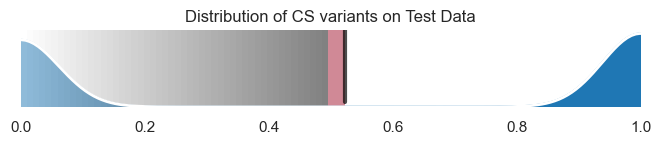

In [50]:
make_ridge_plot_whole(df, np.mean(conf_test), acc_all, title = "Distribution of CS variants on Test Data")
plt.show()

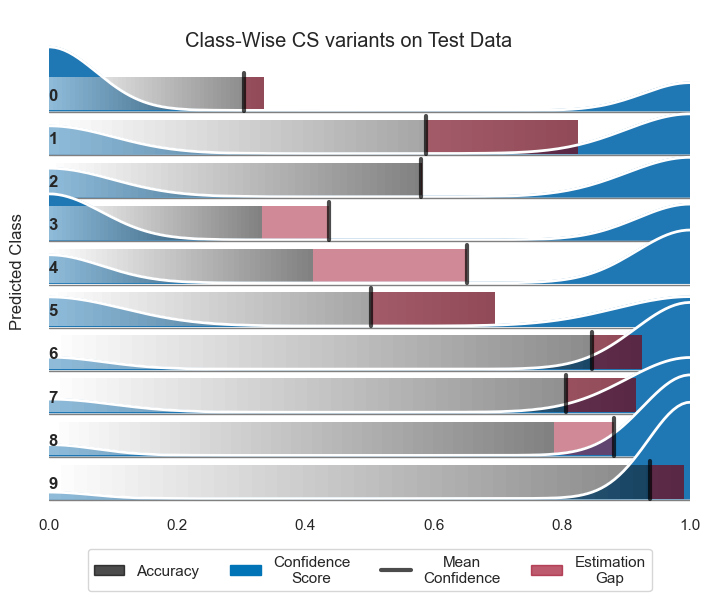

In [51]:
make_ridge_plot(df, mean_conf, cls_acc, height_ratio1 = 0.41, height_ratio2 = 2, title = 'Class-Wise CS variants on Test Data')
plt.show()